In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


file = "WA Police Force Crime Timeseries.xlsx"
WAstats = pd.read_excel(file,sheet_name = "Data")

WAstats.fillna(0, inplace = True)


In [2]:
#list of regions
regionlist = WAstats['Website Region'].unique()
regionlist

array(['Armadale District', 'Cannington District', 'Fremantle District',
       'Goldfields-Esperance District', 'Great Southern District',
       'Joondalup District', 'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Midland District', 'Mirrabooka District', 'Perth District',
       'Pilbara District', 'Regional WA Region', 'South West District',
       'Western Australia', 'Wheatbelt District'], dtype=object)

In [3]:
#list of crimes Lvl1
crimecatagories = WAstats[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2']].value_counts().reset_index()
crimecatagories.drop(columns=[0], inplace = True)
crimecatagories

,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_Lvl2
0,Threatening Behaviour (Non-Family),Threatening Behaviour (Non-Family)
1,Cultivate or Manufacture Drugs,Drug Offences
2,Kidnapping / Child Stealing,Deprivation of Liberty
3,Graffiti,Graffiti
4,Fraud (Not Elsewhere Classified),Fraud & Related Offences
5,Fraud (Credit Card),Fraud & Related Offences
6,Forgery,Fraud & Related Offences
7,Drug Possession,Drug Offences
8,Drug Dealing,Drug Offences
9,Driving Causing Death,Homicide


In [4]:
#list of crimes lvl2
basiccrimedesc = WAstats['WAPOL_Hierarchy_Lvl2'].unique()
basiccrimedesc

array(['Homicide', 'Recent Sexual Offences', 'Historical Sexual Offences',
       'Assault (Family)', 'Assault (Non-Family)',
       'Threatening Behaviour (Family)',
       'Threatening Behaviour (Non-Family)', 'Deprivation of Liberty',
       'Robbery', 'Burglary', 'Stealing of Motor Vehicle', 'Stealing',
       'Property Damage', 'Arson', 'Drug Offences',
       'Receiving and Possession of Stolen Property',
       'Regulated Weapons Offences', 'Graffiti',
       'Fraud & Related Offences', 'Breach of Violence Restraint Order'],
      dtype=object)

## Regional Data

In [5]:
#Regional DF
Regional_df = WAstats[WAstats["Website Region"]=="Regional WA Region"]
Regional_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
117600,Regional WA Region,1.1,Murder,1,Homicide,2007-01-01,2006-07,Regional WA RegionMurderHomicide12007,12007,0.0
117601,Regional WA Region,1.1,Murder,1,Homicide,2007-02-01,2006-07,Regional WA RegionMurderHomicide22007,22007,0.0
117602,Regional WA Region,1.1,Murder,1,Homicide,2007-03-01,2006-07,Regional WA RegionMurderHomicide32007,32007,0.0
117603,Regional WA Region,1.1,Murder,1,Homicide,2007-04-01,2006-07,Regional WA RegionMurderHomicide42007,42007,2.0
117604,Regional WA Region,1.1,Murder,1,Homicide,2007-05-01,2006-07,Regional WA RegionMurderHomicide52007,52007,1.0


In [6]:
Plotting_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
Plotting_df = Plotting_df[Plotting_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
Plotting_df['Period'] = Plotting_df['Period'].dt.strftime('%Y-%m')

In [7]:
Plotting = Plotting_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Plotting

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,31.0,602.0,287.0,447.0,607.0,10.0,890.0,215.0,30.0,38.0,1.0,724.0,77.0,74.0,108.0,14.0,1151.0,121.0,86.0,76.0
2019-03,35.0,759.0,326.0,408.0,904.0,2.0,861.0,322.0,37.0,29.0,2.0,765.0,97.0,99.0,134.0,15.0,1216.0,198.0,94.0,95.0
2019-04,25.0,679.0,238.0,315.0,768.0,5.0,780.0,199.0,26.0,47.0,4.0,696.0,58.0,57.0,95.0,20.0,1253.0,136.0,90.0,70.0
2019-05,22.0,629.0,257.0,288.0,657.0,7.0,804.0,267.0,35.0,54.0,2.0,730.0,88.0,117.0,121.0,12.0,1192.0,144.0,94.0,80.0
2019-06,25.0,554.0,214.0,294.0,609.0,2.0,730.0,235.0,29.0,50.0,2.0,612.0,93.0,61.0,89.0,9.0,971.0,101.0,73.0,40.0
2019-07,30.0,619.0,230.0,323.0,470.0,6.0,790.0,189.0,21.0,45.0,1.0,633.0,78.0,75.0,126.0,10.0,927.0,90.0,70.0,66.0
2019-08,20.0,653.0,284.0,326.0,578.0,6.0,911.0,190.0,26.0,53.0,5.0,629.0,90.0,80.0,165.0,13.0,1014.0,87.0,121.0,70.0
2019-09,25.0,620.0,291.0,281.0,631.0,3.0,898.0,137.0,34.0,31.0,2.0,687.0,70.0,98.0,99.0,14.0,1078.0,162.0,80.0,69.0
2019-10,42.0,665.0,271.0,381.0,771.0,2.0,659.0,286.0,31.0,62.0,4.0,815.0,61.0,95.0,75.0,23.0,1115.0,139.0,95.0,59.0


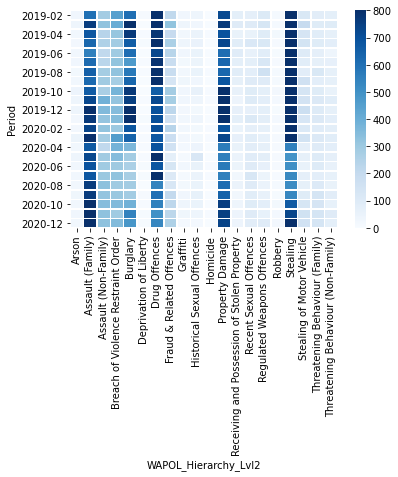

In [8]:
ax = sns.heatmap(Plotting, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [9]:
#key crimes
TopCrimes = Plotting_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keycrimes = TopCrimes[0:6].index.tolist()
keycrimes

['Stealing',
 'Assault (Family)',
 'Drug Offences',
 'Property Damage',
 'Burglary',
 'Breach of Violence Restraint Order']

In [10]:
keycrimes_df = Plotting_df[Plotting_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]
keycrimespivot = keycrimes_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Period,,,,,,
2019-02,602.0,447.0,607.0,890.0,724.0,1151.0
2019-03,759.0,408.0,904.0,861.0,765.0,1216.0
2019-04,679.0,315.0,768.0,780.0,696.0,1253.0
2019-05,629.0,288.0,657.0,804.0,730.0,1192.0
2019-06,554.0,294.0,609.0,730.0,612.0,971.0
2019-07,619.0,323.0,470.0,790.0,633.0,927.0
2019-08,653.0,326.0,578.0,911.0,629.0,1014.0
2019-09,620.0,281.0,631.0,898.0,687.0,1078.0
2019-10,665.0,381.0,771.0,659.0,815.0,1115.0


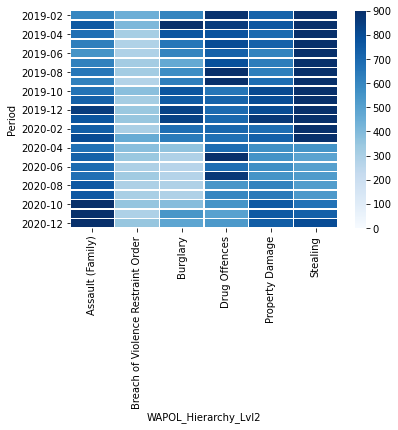

In [11]:
ax = sns.heatmap(keycrimespivot, linewidth=0.5,cmap="Blues", vmin= 0, vmax=900)
plt.show()

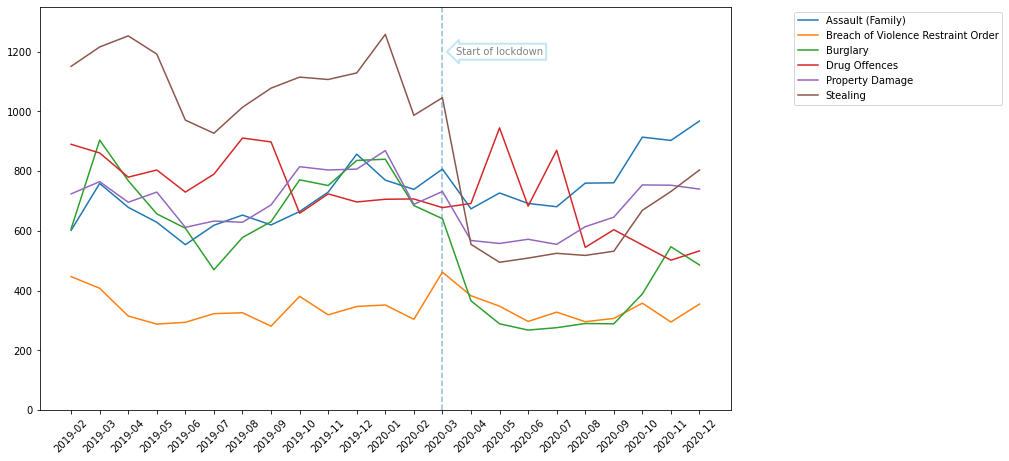

In [12]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivot)
t = axes.text(
    "2020-05", 1200, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 1400,linestyles='dashed', alpha=0.5)
plt.ylim(0,1350)
plt.xticks(rotation=45)
plt.legend(keycrimespivot.columns,bbox_to_anchor = (1.4, 1.0))
plt.show()   

### Regional 2017-2021

In [13]:

y2017_df = Regional_df[Regional_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')
yearly_df = y2017_df.groupby(['WAPOL_Hierarchy_Lvl2','Year'])['COUNT_of_Offnc_ID'].sum().reset_index()
yearly_df = yearly_df[yearly_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]

<ipython-input-13-5a9ddc2829e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')


In [14]:
yearly_pivot = yearly_df.pivot(index='Year', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
yearly_pivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Year,,,,,,
2017,6609.0,3052.0,8105.0,9018.0,8912.0,13118.0
2018,7634.0,3770.0,8021.0,10609.0,8538.0,13228.0
2019,8058.0,4055.0,8357.0,9379.0,8696.0,13377.0
2020,9396.0,4085.0,5366.0,8018.0,8050.0,8630.0


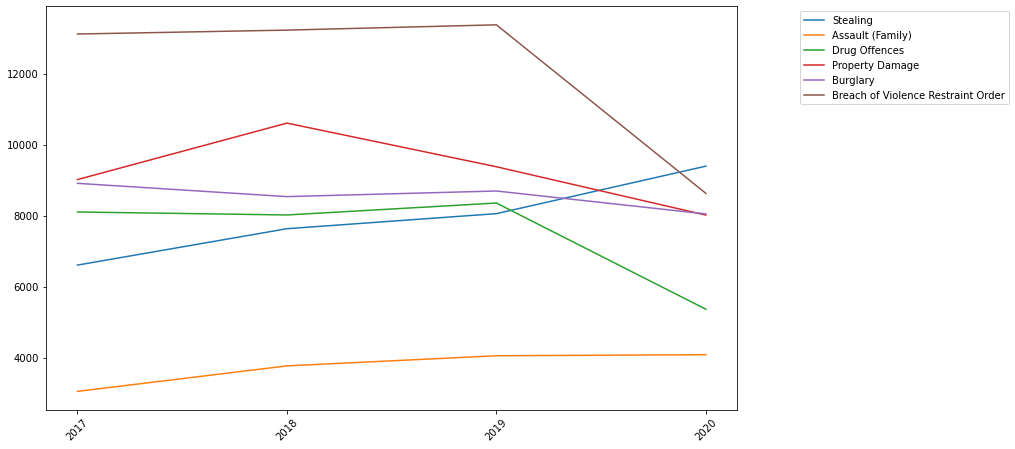

In [15]:
#line graph key crimes 
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(yearly_pivot)

plt.xticks(rotation=45)
plt.legend(keycrimes,bbox_to_anchor = (1.4, 1.0))
plt.show()   

In [16]:
yearly_pivot = yearly_pivot.reset_index().set_index('Year')
crimes = yearly_pivot.columns.tolist()
years = yearly_pivot.index.tolist()
crimes

['Assault (Family)',
 'Breach of Violence Restraint Order',
 'Burglary',
 'Drug Offences',
 'Property Damage',
 'Stealing']

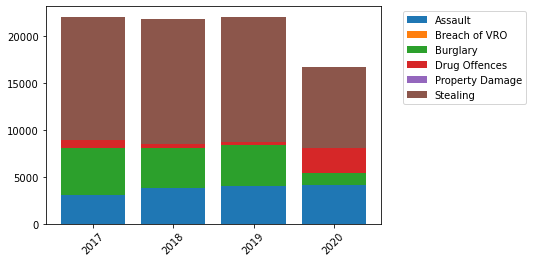

In [17]:

Assault = yearly_pivot[crimes[0]]
BreachofVRO = yearly_pivot[crimes[1]]
Burglary =yearly_pivot[crimes[2]]
Drug =yearly_pivot[crimes[3]]
PropertyDamage =yearly_pivot[crimes[4]]
Stealing = yearly_pivot[crimes[5]]

#plt.bar(crimes, yearly_pivot[crimes[1]] )
fig, ax = plt.subplots()

ax.bar(years, Assault, label = "Assault")
ax.bar(years,BreachofVRO,bottom=Assault, label = 'Breach of VRO')
ax.bar(years,Burglary,bottom=BreachofVRO, label = 'Burglary')
ax.bar(years,Drug,bottom=Burglary, label = 'Drug Offences')
ax.bar(years,PropertyDamage,bottom=Drug, label = 'Property Damage')
ax.bar(years,Stealing,bottom=PropertyDamage, label = 'Stealing')


ax.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

In [18]:
mean = yearly_pivot.mean()
mean

WAPOL_Hierarchy_Lvl2
Assault (Family)                       7924.25
Breach of Violence Restraint Order     3740.50
Burglary                               7462.25
Drug Offences                          9256.00
Property Damage                        8549.00
Stealing                              12088.25
dtype: float64

In [19]:

Plotting2 = Plotting.reset_index()

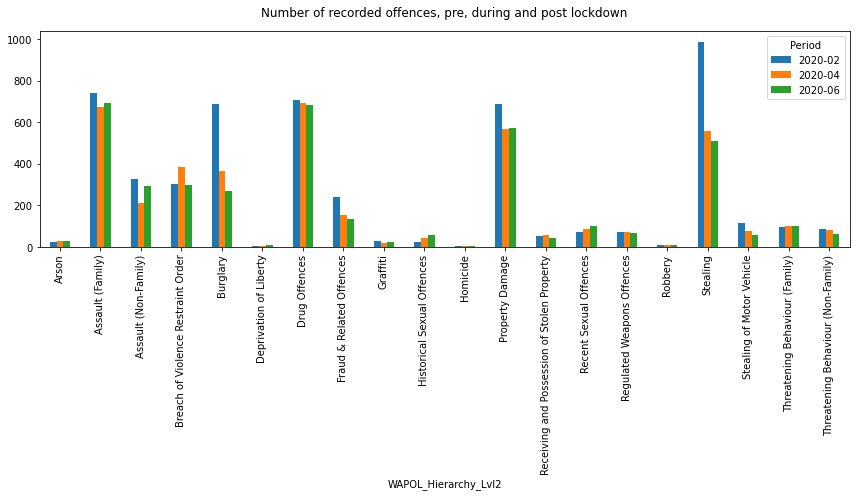

In [20]:

Lockdownperiods = Plotting2.loc[(Plotting2["Period"]=='2020-02')|(Plotting2["Period"]=='2020-04')|(Plotting2["Period"]=='2020-06')].set_index('Period')
Transposed = Lockdownperiods.T
Transposed.plot.bar(figsize=(12,7))
plt.title("Number of recorded offences, pre, during and post lockdown", pad=15)
plt.tight_layout()
plt.savefig("crimesoverperiodbar.png",bbox_inches='tight')
plt.show()


In [21]:
Transposed

Period,2020-02,2020-04,2020-06
WAPOL_Hierarchy_Lvl2,,,
Arson,24.0,27.0,26.0
Assault (Family),739.0,674.0,692.0
Assault (Non-Family),324.0,213.0,294.0
Breach of Violence Restraint Order,304.0,383.0,297.0
Burglary,685.0,366.0,268.0
Deprivation of Liberty,4.0,6.0,8.0
Drug Offences,707.0,692.0,683.0
Fraud & Related Offences,238.0,154.0,132.0
Graffiti,27.0,16.0,25.0


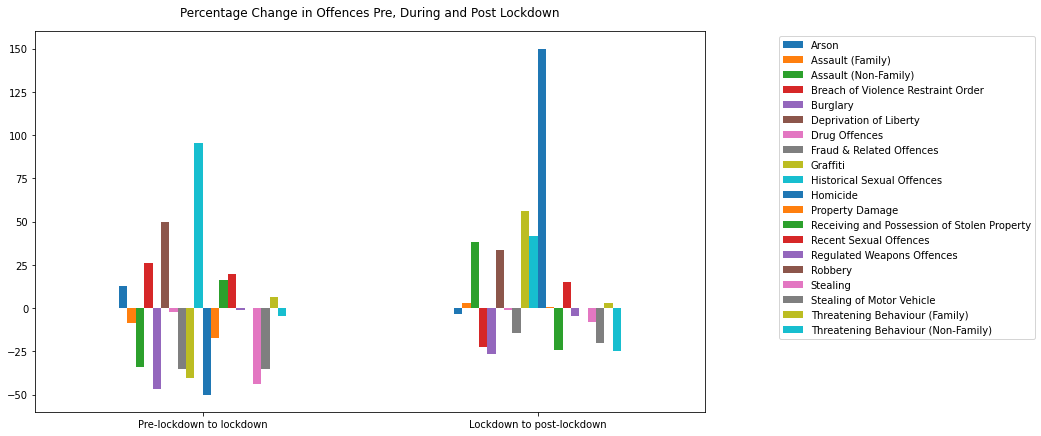

In [22]:

Change = Lockdownperiods.pct_change().multiply(100).round(2)
Change.dropna(axis='rows', inplace=True)
Renamed = Change.copy()
Renamed.index =["Pre-lockdown to lockdown","Lockdown to post-lockdown"]
Renamed.plot(kind ='bar',figsize=(12,7))

plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.title("Percentage Change in Offences Pre, During and Post Lockdown", pad=15)
plt.xticks(rotation=360)
plt.savefig("crimespercentchange.png",bbox_inches='tight')
plt.show()

In [23]:
Change

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2020-04,12.5,-8.80,-34.26,25.99,-46.57,50.00,-2.12,-35.29,-40.74,95.24,-50.0,-17.56,16.00,19.44,-1.43,0.0,-43.77,-35.09,6.45,-4.76
2020-06,-3.7,2.67,38.03,-22.45,-26.78,33.33,-1.30,-14.29,56.25,41.46,150.0,0.70,-24.14,15.12,-4.35,0.0,-8.29,-20.27,3.03,-25.00


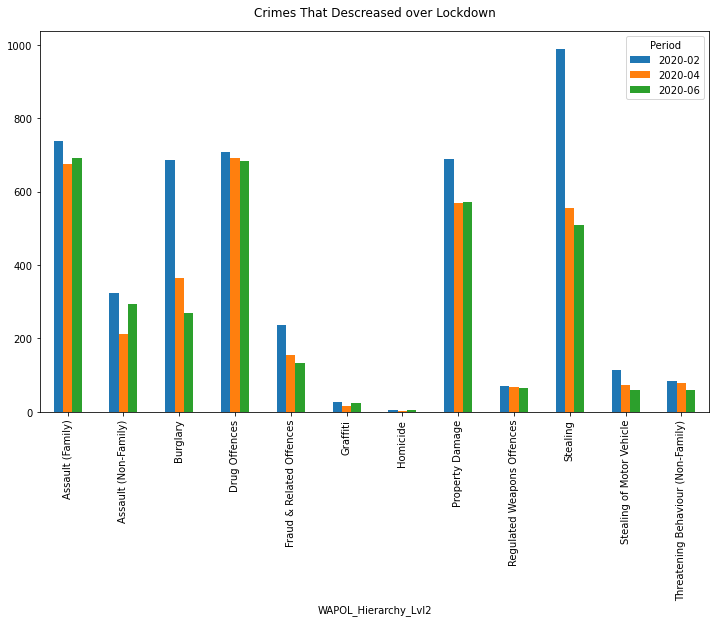

In [24]:
ChangeTransposed = Change.T
Crimesincoverlock = ChangeTransposed[ChangeTransposed["2020-04"]>0]
Crimesdecoverlock = ChangeTransposed[ChangeTransposed["2020-04"]<0]
Crimesdecoverlock.index
Transposed.loc[Crimesdecoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Descreased over Lockdown", pad=15)
plt.savefig("decreasingcrimes.png",bbox_inches='tight')
plt.show()

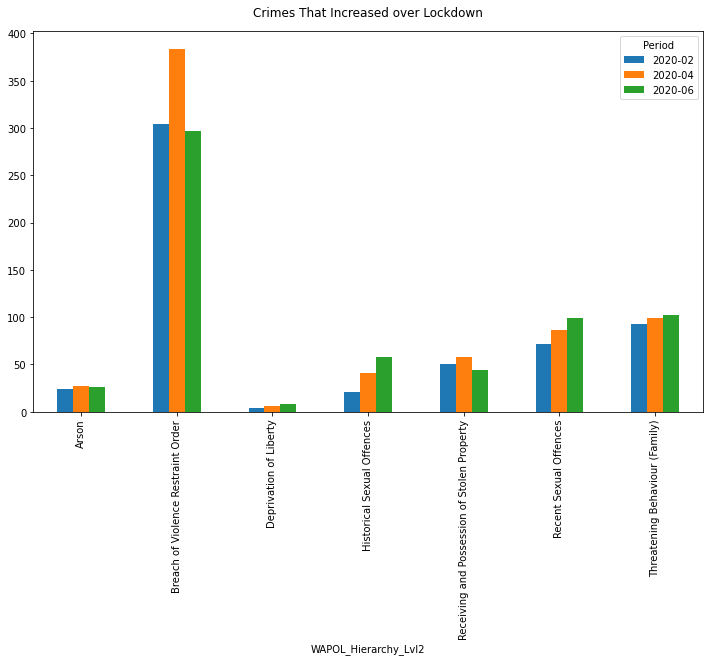

In [25]:
Transposed.loc[Crimesincoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Increased over Lockdown", pad=15)
plt.savefig("increasingcrimes.png",bbox_inches='tight')
plt.show()

In [26]:
for index in Change.index:
    print(Change.loc[index])

WAPOL_Hierarchy_Lvl2
Arson                                          12.50
Assault (Family)                               -8.80
Assault (Non-Family)                          -34.26
Breach of Violence Restraint Order             25.99
Burglary                                      -46.57
Deprivation of Liberty                         50.00
Drug Offences                                  -2.12
Fraud & Related Offences                      -35.29
Graffiti                                      -40.74
Historical Sexual Offences                     95.24
Homicide                                      -50.00
Property Damage                               -17.56
Receiving and Possession of Stolen Property    16.00
Recent Sexual Offences                         19.44
Regulated Weapons Offences                     -1.43
Robbery                                         0.00
Stealing                                      -43.77
Stealing of Motor Vehicle                     -35.09
Threatening Behaviour (Fa

In [27]:
Plotting2 = Plotting.reset_index()
prelockdown = Plotting2.loc[Plotting2["Period"]=='2020-02']
atlockdown = Plotting2.loc[Plotting2["Period"]=='2020-03']
postlockdown = Plotting2.loc[Plotting2["Period"]=='2020-06']

x = prelockdown - atlockdown
type(prelockdown)
Plotting2.set_index('Period').diff()

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,4.0,157.0,39.0,-39.0,297.0,-8.0,-29.0,107.0,7.0,-9.0,1.0,41.0,20.0,25.0,26.0,1.0,65.0,77.0,8.0,19.0
2019-04,-10.0,-80.0,-88.0,-93.0,-136.0,3.0,-81.0,-123.0,-11.0,18.0,2.0,-69.0,-39.0,-42.0,-39.0,5.0,37.0,-62.0,-4.0,-25.0
2019-05,-3.0,-50.0,19.0,-27.0,-111.0,2.0,24.0,68.0,9.0,7.0,-2.0,34.0,30.0,60.0,26.0,-8.0,-61.0,8.0,4.0,10.0
2019-06,3.0,-75.0,-43.0,6.0,-48.0,-5.0,-74.0,-32.0,-6.0,-4.0,0.0,-118.0,5.0,-56.0,-32.0,-3.0,-221.0,-43.0,-21.0,-40.0
2019-07,5.0,65.0,16.0,29.0,-139.0,4.0,60.0,-46.0,-8.0,-5.0,-1.0,21.0,-15.0,14.0,37.0,1.0,-44.0,-11.0,-3.0,26.0
2019-08,-10.0,34.0,54.0,3.0,108.0,0.0,121.0,1.0,5.0,8.0,4.0,-4.0,12.0,5.0,39.0,3.0,87.0,-3.0,51.0,4.0
2019-09,5.0,-33.0,7.0,-45.0,53.0,-3.0,-13.0,-53.0,8.0,-22.0,-3.0,58.0,-20.0,18.0,-66.0,1.0,64.0,75.0,-41.0,-1.0
2019-10,17.0,45.0,-20.0,100.0,140.0,-1.0,-239.0,149.0,-3.0,31.0,2.0,128.0,-9.0,-3.0,-24.0,9.0,37.0,-23.0,15.0,-10.0


In [28]:
prelockdown

WAPOL_Hierarchy_Lvl2,Period,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,...,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
12,2020-02,24.0,739.0,324.0,304.0,685.0,4.0,707.0,238.0,27.0,...,4.0,689.0,50.0,72.0,70.0,10.0,987.0,114.0,93.0,84.0


In [29]:
lvl1group_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl1','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
lvl1group_df = lvl1group_df[lvl1group_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
lvl1group_df['Period'] = lvl1group_df['Period'].dt.strftime('%Y-%m')

In [30]:

pivotlvl1 = lvl1group_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl1', values='COUNT_of_Offnc_ID')
pivotlvl1

WAPOL_Hierarchy_Lvl1,Assault Police Officer,Attempted / Conspiracy to Murder,Breach of Family Violence Restraint Order,Breach of Police Order,Breach of Violence Restraint Order,Burglary (Dwelling),Burglary (Non-Dwelling),Cause Bushfire,Cause Damage by Fire,Common Assault (Family),...,Sexual Assault,Stealing (Not Elsewhere Classified),Stealing From Dwelling,Stealing From Motor Vehicle (Contents or Parts),Stealing From Other Premises or Place,Stealing From Retail Premises (Shoplift),Stealing as a Servant,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,,
2017-02,34.0,0.0,123.0,85.0,12.0,538.0,273.0,13.0,23.0,458.0,...,151.0,1315.0,0.0,0.0,0.0,0.0,6.0,156.0,55.0,32.0
2017-03,37.0,1.0,269.0,110.0,24.0,525.0,262.0,13.0,19.0,471.0,...,131.0,1314.0,0.0,0.0,0.0,0.0,4.0,143.0,87.0,60.0
2017-04,30.0,0.0,158.0,85.0,18.0,421.0,228.0,7.0,29.0,465.0,...,70.0,1122.0,0.0,0.0,0.0,0.0,6.0,113.0,47.0,26.0
2017-05,40.0,0.0,131.0,90.0,20.0,475.0,168.0,5.0,21.0,389.0,...,112.0,1416.0,0.0,0.0,0.0,0.0,3.0,94.0,47.0,29.0
2017-06,38.0,0.0,112.0,72.0,36.0,530.0,216.0,1.0,23.0,430.0,...,65.0,221.0,266.0,211.0,395.0,127.0,4.0,118.0,43.0,29.0
2017-07,36.0,0.0,139.0,90.0,34.0,421.0,209.0,0.0,22.0,412.0,...,140.0,0.0,252.0,259.0,352.0,178.0,10.0,157.0,53.0,29.0
2017-08,29.0,0.0,175.0,93.0,23.0,551.0,185.0,4.0,26.0,421.0,...,129.0,0.0,266.0,311.0,362.0,201.0,11.0,148.0,65.0,35.0
2017-09,35.0,0.0,172.0,123.0,17.0,506.0,197.0,4.0,25.0,456.0,...,120.0,0.0,241.0,281.0,358.0,197.0,13.0,148.0,66.0,26.0
2017-10,22.0,0.0,204.0,85.0,12.0,601.0,230.0,5.0,24.0,529.0,...,83.0,0.0,293.0,309.0,378.0,195.0,5.0,158.0,63.0,28.0


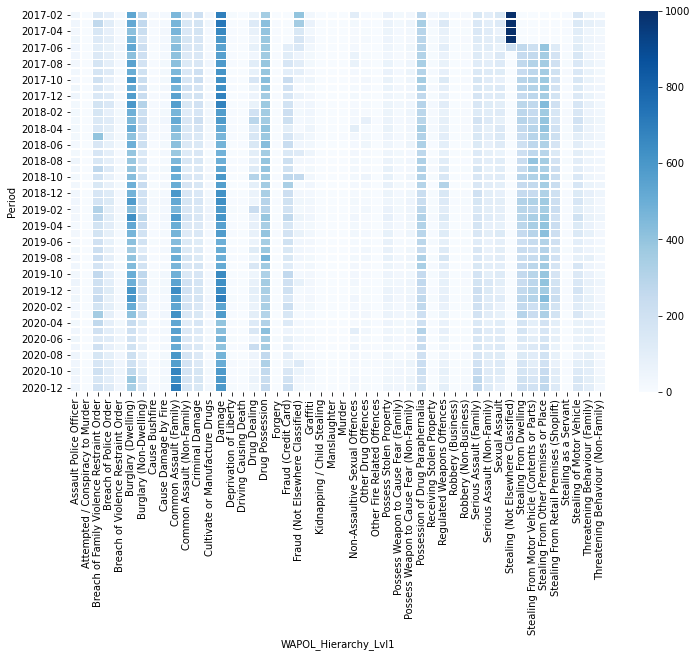

In [31]:
fig= plt.figure(figsize=(12,7))
ax = sns.heatmap(pivotlvl1, linewidth=0.5,cmap="Blues", vmin= 0, vmax=1000)
plt.show()

In [32]:
plt.bar(Plotting)

TypeError: bar() missing 1 required positional argument: 'height'

NameError: name 'plot_df' is not defined

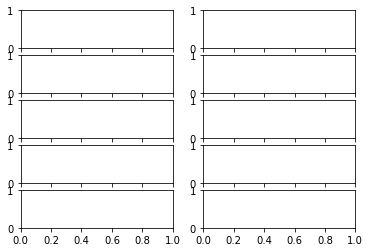

In [34]:
a = 0
fig, axs = plt.subplots(5,2, sharex=True, sharey=False)
axs = axs.ravel()

for crime in basiccrimedesc:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']   
    axs[a].plot(x,y)
    a += 1
plt.figure(figsize=(20,12))
plt.savefig("Crime.png")
 
plt.show()        




In [35]:
for crime in keycrimes:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']  
    plt.scatter(x,y, label=crime)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

NameError: name 'plot_df' is not defined

## Metro Data

In [36]:
#Regional DF
WA_df = WAstats[WAstats["Website Region"]=="Western Australia"]
WA_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
134400,Western Australia,1.1,Murder,1,Homicide,2007-01-01,2006-07,Western AustraliaMurderHomicide12007,12007,4.0
134401,Western Australia,1.1,Murder,1,Homicide,2007-02-01,2006-07,Western AustraliaMurderHomicide22007,22007,0.0
134402,Western Australia,1.1,Murder,1,Homicide,2007-03-01,2006-07,Western AustraliaMurderHomicide32007,32007,3.0
134403,Western Australia,1.1,Murder,1,Homicide,2007-04-01,2006-07,Western AustraliaMurderHomicide42007,42007,2.0
134404,Western Australia,1.1,Murder,1,Homicide,2007-05-01,2006-07,Western AustraliaMurderHomicide52007,52007,4.0


In [37]:
WAplot_df = WA_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
WAplot_df = WAplot_df[WAplot_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
WAplot_df['Period'] = WAplot_df['Period'].dt.strftime('%Y-%m')

In [38]:
WA_Pivot = WAplot_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')

In [39]:
WA_Pivot

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2017-02,81.0,1625.0,1016.0,839.0,2805.0,25.0,2489.0,1273.0,224.0,173.0,8.0,2757.0,426.0,494.0,341.0,99.0,7004.0,650.0,228.0,256.0
2017-03,89.0,1574.0,1064.0,1088.0,2810.0,14.0,3058.0,1449.0,162.0,232.0,8.0,2993.0,424.0,301.0,451.0,112.0,7367.0,646.0,272.0,372.0
2017-04,84.0,1599.0,1067.0,718.0,2446.0,33.0,2653.0,928.0,154.0,163.0,9.0,2729.0,348.0,250.0,386.0,106.0,6534.0,540.0,216.0,301.0
2017-05,74.0,1426.0,1088.0,796.0,2838.0,17.0,2636.0,1317.0,175.0,221.0,3.0,2510.0,359.0,339.0,304.0,119.0,7422.0,609.0,203.0,268.0
2017-06,80.0,1347.0,1014.0,723.0,3033.0,20.0,2727.0,1656.0,168.0,187.0,10.0,2282.0,563.0,223.0,437.0,87.0,6847.0,664.0,166.0,262.0
2017-07,60.0,1427.0,802.0,933.0,2594.0,23.0,2687.0,2352.0,133.0,261.0,7.0,2376.0,321.0,275.0,317.0,89.0,6525.0,557.0,212.0,220.0
2017-08,67.0,1499.0,994.0,845.0,2590.0,20.0,2990.0,2284.0,145.0,139.0,3.0,2339.0,368.0,398.0,441.0,101.0,6657.0,560.0,221.0,274.0
2017-09,64.0,1504.0,1000.0,738.0,2552.0,28.0,2529.0,2299.0,120.0,214.0,7.0,2456.0,387.0,290.0,340.0,136.0,6435.0,579.0,204.0,300.0
2017-10,85.0,1692.0,1001.0,1040.0,2915.0,23.0,2718.0,2449.0,144.0,176.0,3.0,2720.0,373.0,254.0,368.0,98.0,6995.0,576.0,195.0,284.0


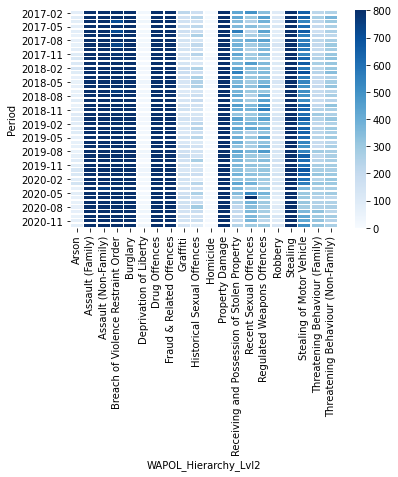

In [40]:
ax = sns.heatmap(WA_Pivot, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [41]:
TopWACrimes = WAplot_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keyWAcrimes = TopWACrimes[0:7].index.tolist()
keyWAcrimes

['Stealing',
 'Drug Offences',
 'Burglary',
 'Property Damage',
 'Fraud & Related Offences',
 'Assault (Family)',
 'Assault (Non-Family)']

<AxesSubplot:xlabel='WAPOL_Hierarchy_Lvl2'>

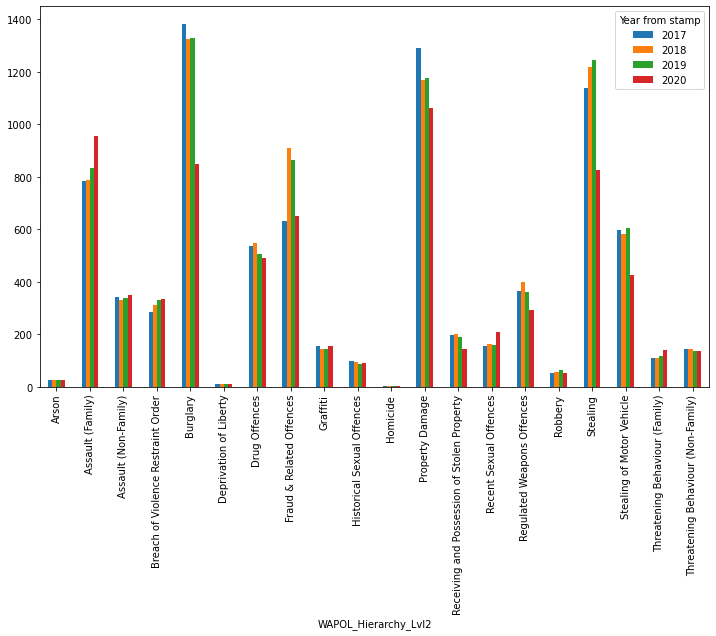

In [42]:
Yearlydf = WA_df.copy()
Yearlydf = Yearlydf[Yearlydf['Period']>dt.datetime(year=2017, month = 1, day = 1)]
Yearlydf['Year from stamp']= Yearlydf['Period'].dt.strftime('%Y')
Yearlydf['Month from stamp']= Yearlydf['Period'].dt.strftime('%m')
#Yearlydf = Yearlydf.groupby(['WAPOL_Hierarchy_Lvl2','Year from stamp'])['COUNT_of_Offnc_ID'].sum().reset_index()
#Yearlydf= Yearlydf.pivot(index='Year from stamp', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Meandf=Yearlydf.groupby(['WAPOL_Hierarchy_Lvl2','Year from stamp'])['COUNT_of_Offnc_ID'].mean().reset_index()
STDdf=Yearlydf.groupby(['WAPOL_Hierarchy_Lvl2','Year from stamp'])['COUNT_of_Offnc_ID'].std().reset_index()
yearlycrimespivotwa = Meandf.pivot(index='Year from stamp', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
yearlystdpivotwa = STDdf.pivot(index='Year from stamp', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
YT = yearlycrimespivotwa.transpose()
YT.plot.bar(figsize=(12,7))

In [43]:
yearlycrimespivotwa

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Year from stamp,,,,,,,,,,,,,,,,,,,,
2017,27.242424,783.000000,343.060606,285.181818,1379.909091,10.772727,537.127273,629.303030,153.454545,96.590909,2.022727,1290.363636,197.545455,155.318182,366.090909,51.227273,1137.606061,595.272727,108.909091,144.318182
2018,27.166667,786.500000,331.250000,311.972222,1322.541667,11.791667,548.050000,907.888889,143.333333,94.958333,2.125000,1169.166667,202.541667,163.750000,399.166667,54.333333,1216.444444,580.000000,110.833333,142.291667
2019,27.583333,834.250000,339.111111,330.722222,1327.250000,12.125000,503.700000,863.361111,142.583333,88.416667,1.791667,1174.500000,189.666667,159.625000,360.916667,63.041667,1245.125000,602.750000,118.000000,137.250000
2020,26.805556,955.541667,348.083333,332.750000,848.583333,12.166667,490.300000,651.388889,154.916667,90.458333,2.125000,1061.708333,142.666667,209.958333,293.250000,52.750000,824.819444,425.500000,141.791667,135.916667


In [44]:
keycrimeswa_df = WAplot_df[WAplot_df['WAPOL_Hierarchy_Lvl2'].isin(keyWAcrimes)]
keycrimespivotwa = keycrimeswa_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivotwa

WAPOL_Hierarchy_Lvl2,Assault (Family),Assault (Non-Family),Burglary,Drug Offences,Fraud & Related Offences,Property Damage,Stealing
Period,,,,,,,
2017-02,1625.0,1016.0,2805.0,2489.0,1273.0,2757.0,7004.0
2017-03,1574.0,1064.0,2810.0,3058.0,1449.0,2993.0,7367.0
2017-04,1599.0,1067.0,2446.0,2653.0,928.0,2729.0,6534.0
2017-05,1426.0,1088.0,2838.0,2636.0,1317.0,2510.0,7422.0
2017-06,1347.0,1014.0,3033.0,2727.0,1656.0,2282.0,6847.0
2017-07,1427.0,802.0,2594.0,2687.0,2352.0,2376.0,6525.0
2017-08,1499.0,994.0,2590.0,2990.0,2284.0,2339.0,6657.0
2017-09,1504.0,1000.0,2552.0,2529.0,2299.0,2456.0,6435.0
2017-10,1692.0,1001.0,2915.0,2718.0,2449.0,2720.0,6995.0


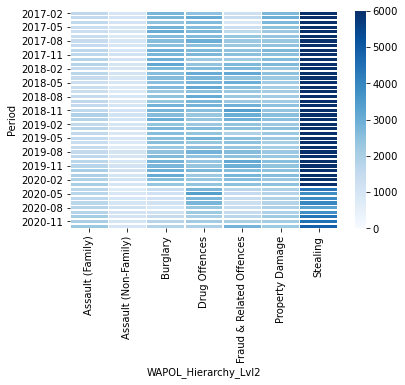

In [45]:
ax = sns.heatmap(keycrimespivotwa, linewidth=0.5,cmap="Blues", vmin=0, vmax=6000)
plt.show()

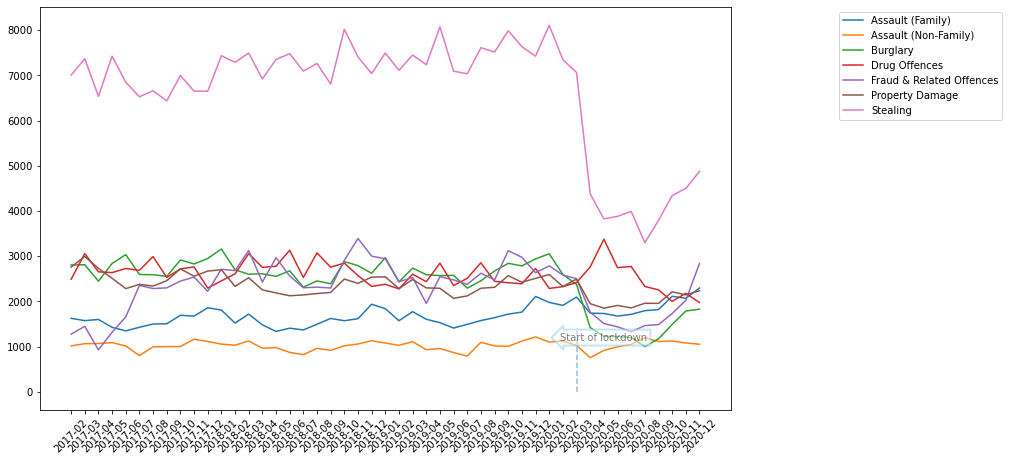

In [46]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivotwa)
t = axes.text(
    "2020-05", 1200, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 1400,linestyles='dashed', alpha=0.5)
#plt.ylim(0,1350)
plt.xticks(rotation=45)
plt.legend(keycrimespivotwa.columns,bbox_to_anchor = (1.4, 1.0))
plt.show()   

In [47]:
#from 2019
WAplot2019_df = WA_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
WAplot2019_df = WAplot2019_df[WAplot2019_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
WAplot2019_df['Period'] = WAplot2019_df['Period'].dt.strftime('%Y-%m')

In [48]:
WA2019_Pivot = WAplot2019_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')

In [49]:
keycrimeswa2019_df = WAplot2019_df[WAplot2019_df['WAPOL_Hierarchy_Lvl2'].isin(keyWAcrimes)]
keycrimespivotwa2019 = keycrimeswa2019_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivotwa2019

WAPOL_Hierarchy_Lvl2,Assault (Family),Assault (Non-Family),Burglary,Drug Offences,Fraud & Related Offences,Property Damage,Stealing
Period,,,,,,,
2019-02,1572.0,1028.0,2431.0,2276.0,2434.0,2282.0,7110.0
2019-03,1772.0,1108.0,2736.0,2602.0,2528.0,2485.0,7448.0
2019-04,1604.0,931.0,2590.0,2436.0,1955.0,2298.0,7235.0
2019-05,1529.0,957.0,2569.0,2846.0,2545.0,2289.0,8072.0
2019-06,1410.0,867.0,2575.0,2349.0,2475.0,2068.0,7090.0
2019-07,1492.0,790.0,2293.0,2511.0,2377.0,2121.0,7035.0
2019-08,1576.0,1094.0,2455.0,2853.0,2622.0,2290.0,7610.0
2019-09,1640.0,1014.0,2672.0,2444.0,2475.0,2311.0,7515.0
2019-10,1718.0,1006.0,2841.0,2411.0,3120.0,2570.0,7985.0


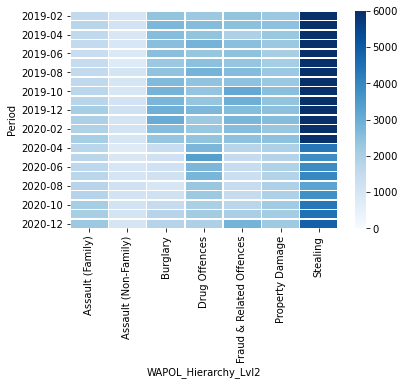

In [50]:
ax = sns.heatmap(keycrimespivotwa2019, linewidth=0.5,cmap="Blues", vmin=0, vmax=6000)
plt.savefig("WAkeycrimeheatmap.png",bbox_inches='tight')
plt.show()   

In [51]:
keycrimespivotwa2019.columns

Index(['Assault (Family)', 'Assault (Non-Family)', 'Burglary', 'Drug Offences',
       'Fraud & Related Offences', 'Property Damage', 'Stealing'],
      dtype='object', name='WAPOL_Hierarchy_Lvl2')

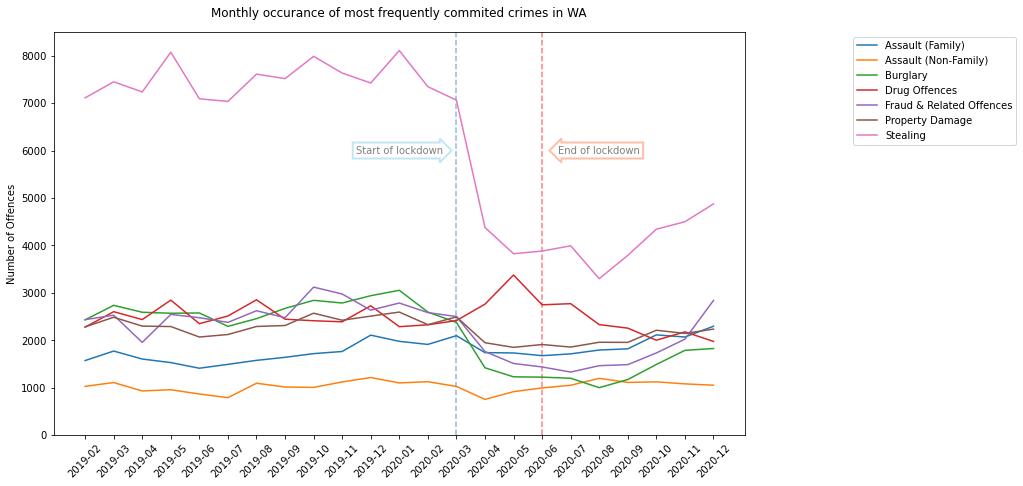

In [52]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivotwa2019)
t = axes.text(
    "2020-01", 6000, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))
axes.text(
    "2020-08", 6000, "End of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="coral", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 9000,linestyles='dashed', alpha=0.5)
plt.vlines("2020-06",ymin = 0, ymax = 9000, colors ="red",linestyles='dashed', alpha=0.5)
plt.ylim(0,8500)
plt.xticks(rotation=45)
plt.title("Monthly occurance of most frequently commited crimes in WA", pad=15)
plt.ylabel("Number of Offences")
plt.legend(keycrimespivotwa2019.columns,bbox_to_anchor = (1.4, 1.0))
plt.savefig("WAkeycrimetrends.png",bbox_inches='tight')
plt.show()   

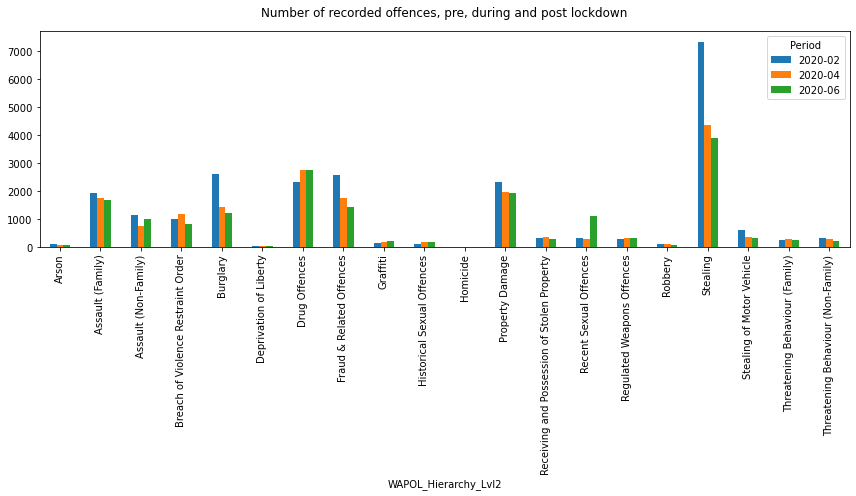

In [53]:
plotWA2 = WA2019_Pivot.reset_index()
LockdownperiodsWA = plotWA2.loc[(plotWA2["Period"]=='2020-02')|(plotWA2["Period"]=='2020-04')|(plotWA2["Period"]=='2020-06')].set_index('Period')
Transposed2 = LockdownperiodsWA.T
Transposed2.plot.bar(figsize=(12,7))
plt.title("Number of recorded offences, pre, during and post lockdown", pad=15)
plt.tight_layout()
plt.savefig("crimeswaoverperiodbar.png",bbox_inches='tight')
plt.show()


In [54]:
ChangeWA

NameError: name 'ChangeWA' is not defined

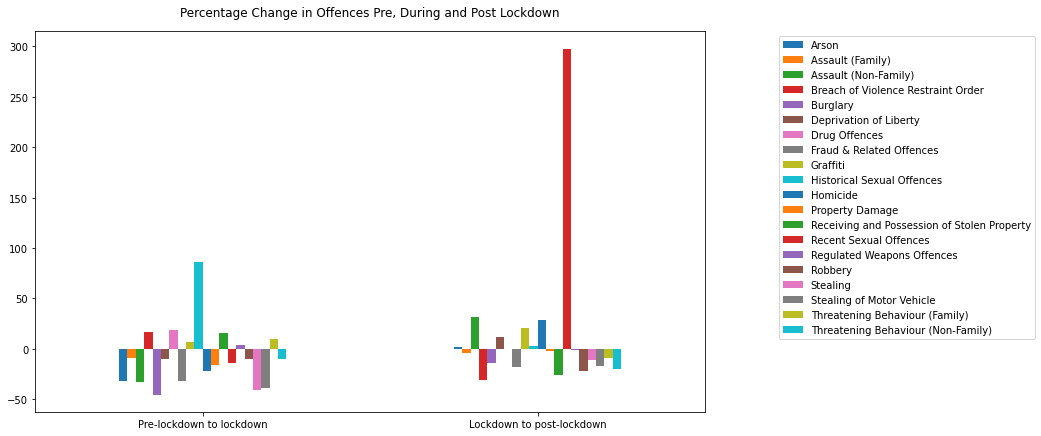

In [55]:

ChangeWA = LockdownperiodsWA.pct_change().multiply(100).round(2)
ChangeWA.dropna(axis='rows', inplace=True)
RenamedWA = ChangeWA.copy()
RenamedWA.index =["Pre-lockdown to lockdown","Lockdown to post-lockdown"]
RenamedWA.plot(kind ='bar',figsize=(12,7))

plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.title("Percentage Change in Offences Pre, During and Post Lockdown", pad=15)
plt.xticks(rotation=360)
plt.savefig("crimeswapercentchange.png",bbox_inches='tight')
plt.show()

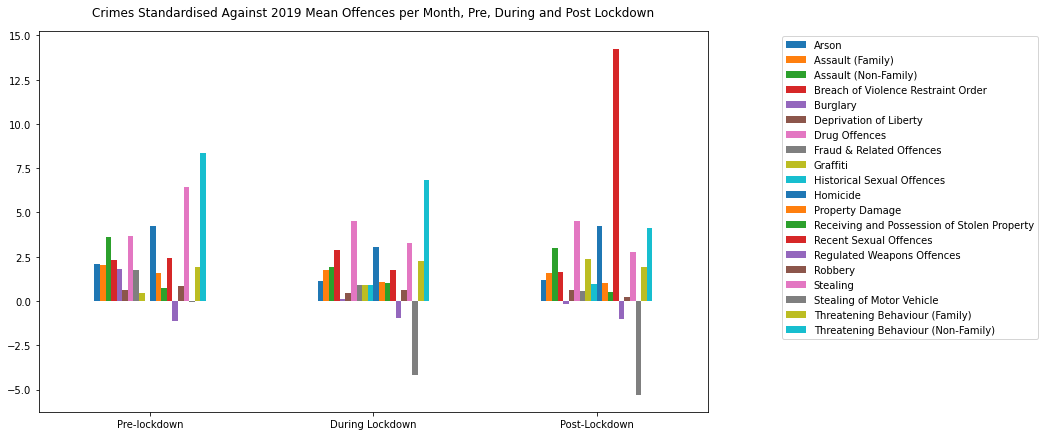

In [56]:

mean = yearlycrimespivotwa.T
std = yearlystdpivotwa.T

sdf = pd.merge(Transposed2,mean["2019"],on='WAPOL_Hierarchy_Lvl2')
sdf = pd.merge(sdf,std["2019"],on='WAPOL_Hierarchy_Lvl2')
mean["2019"]
std["2019"]
standardised = (Transposed2["2020-02"]-mean['2019'])/std["2019"]


#df = sdf.apply(lambda x: Transposed2[x] in ['b', 'f'] else x, axis=1)
# #df = sdf.apply(lambda x: max(len(x['2020-2']), len(x['b'])), axis=1)
std_df = pd.DataFrame()
# hotel_df.loc[index, 'Hotel Name'] = results[0]['name']
for column in Transposed2:
    std_df[column] = (Transposed2[column]-mean['2019'])/std["2019"]
plotstd = std_df.T.copy()
plotstd.index = ["Pre-lockdown", "During Lockdown","Post-Lockdown"]
plotstd.plot(kind='bar',figsize=(12,7))
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.xticks(rotation=360)
plt.title("Crimes Standardised Against 2019 Mean Offences per Month, Pre, During and Post Lockdown", pad=15)
plt.savefig("standardisedcrimes.png",bbox_inches='tight')
plt.show()

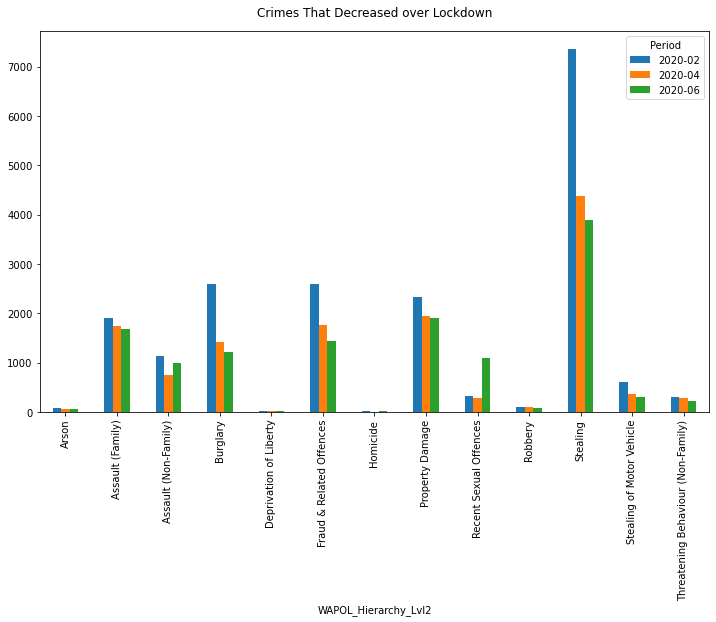

In [57]:
# ChangeWAT = ChangeWA.T
CrimesWAincoverlock = ChangeWA.T[ChangeWA.T["2020-04"]>0]
CrimesWAdecoverlock = ChangeWA.T[ChangeWA.T["2020-04"]<0]
CrimesWAdecoverlock.index
Transposed2.loc[CrimesWAdecoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Decreased over Lockdown", pad=15)
plt.savefig("decreasingwacrimes.png",bbox_inches='tight')
plt.show()

In [58]:
RenamedWA

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Pre-lockdown to lockdown,-31.82,-9.05,-33.04,16.30,-45.30,-10.53,18.70,-31.78,6.58,86.52,-22.22,-16.32,15.34,-13.56,3.75,-10.28,-40.41,-38.80,9.50,-10.10
Lockdown to post-lockdown,1.67,-3.68,31.96,-31.11,-13.88,11.76,-0.51,-18.44,20.37,2.41,28.57,-1.95,-25.48,297.81,-1.32,-21.88,-11.35,-16.94,-9.43,-19.93


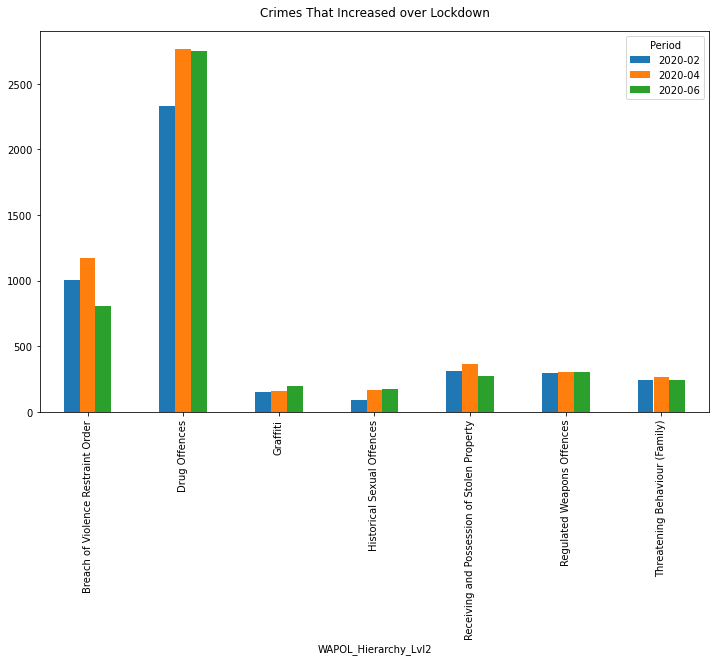

In [59]:
Transposed2.loc[CrimesWAincoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Increased over Lockdown", pad=15)
plt.savefig("increasingcrimeswa.png",bbox_inches='tight')
plt.show()

In [60]:
Population = 2667.1

In [61]:
Rate = Transposed2["2020-02"]/Population
Rate

WAPOL_Hierarchy_Lvl2
Arson                                          0.032995
Assault (Family)                               0.716884
Assault (Non-Family)                           0.422181
Breach of Violence Restraint Order             0.377189
Burglary                                       0.972592
Deprivation of Liberty                         0.007124
Drug Offences                                  0.872108
Fraud & Related Offences                       0.968468
Graffiti                                       0.056991
Historical Sexual Offences                     0.033370
Homicide                                       0.003374
Property Damage                                0.872858
Receiving and Possession of Stolen Property    0.117356
Recent Sexual Offences                         0.118856
Regulated Weapons Offences                     0.109857
Robbery                                        0.040118
Stealing                                       2.753927
Stealing of Motor Vehicle  

In [62]:
rate_df = pd.DataFrame()
for column in Transposed2:
    rate_df[column] = (Transposed2[column]/Population)
rate_df

,2020-02,2020-04,2020-06
WAPOL_Hierarchy_Lvl2,,,
Arson,0.032995,0.022496,0.022871
Assault (Family),0.716884,0.652019,0.628023
Assault (Non-Family),0.422181,0.282704,0.373064
Breach of Violence Restraint Order,0.377189,0.438679,0.302201
Burglary,0.972592,0.532039,0.458176
Deprivation of Liberty,0.007124,0.006374,0.007124
Drug Offences,0.872108,1.035207,1.029958
Fraud & Related Offences,0.968468,0.660643,0.538787
Graffiti,0.056991,0.060740,0.073113


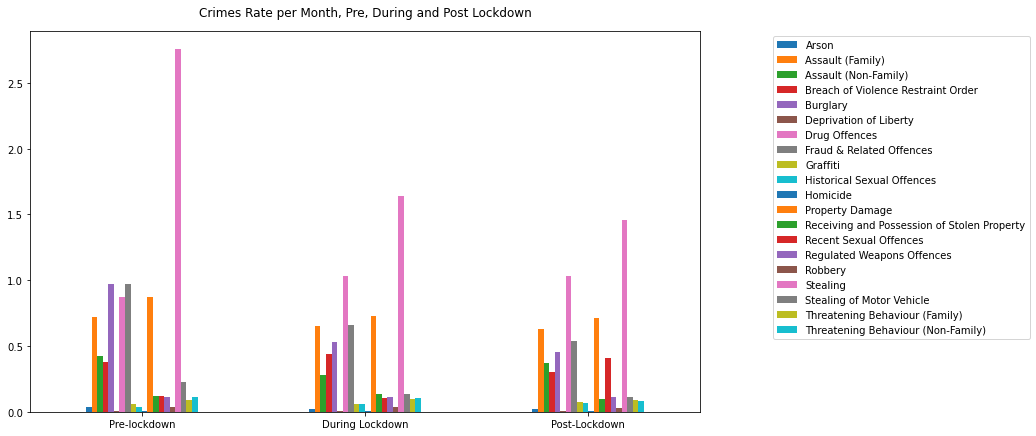

In [63]:
plotrate = rate_df.T.copy()
plotrate.index = ["Pre-lockdown", "During Lockdown","Post-Lockdown"]
plotrate.plot(kind='bar',figsize=(12,7))
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.xticks(rotation=360)
plt.title("Crimes Rate per Month, Pre, During and Post Lockdown", pad=15)
plt.savefig("crimerates.png",bbox_inches='tight')
plt.show()

In [64]:
Grouped = WAstats.groupby(['Website Region','Period','WAPOL_Hierarchy_Lvl2'])['COUNT_of_Offnc_ID'].sum().reset_index()
Grouped2019 = Grouped[Grouped["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
#Grouped['Period'] = Grouped['Period'].dt.strftime('%Y-%m')
Grouped2019

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID
2900,Armadale District,2019-02-01,Arson,13.0
2901,Armadale District,2019-02-01,Assault (Family),142.0
2902,Armadale District,2019-02-01,Assault (Non-Family),89.0
2903,Armadale District,2019-02-01,Breach of Violence Restraint Order,118.0
2904,Armadale District,2019-02-01,Burglary,243.0
...,...,...,...,...
60475,Wheatbelt District,2020-12-01,Robbery,2.0
60476,Wheatbelt District,2020-12-01,Stealing,44.0
60477,Wheatbelt District,2020-12-01,Stealing of Motor Vehicle,5.0
60478,Wheatbelt District,2020-12-01,Threatening Behaviour (Family),7.0


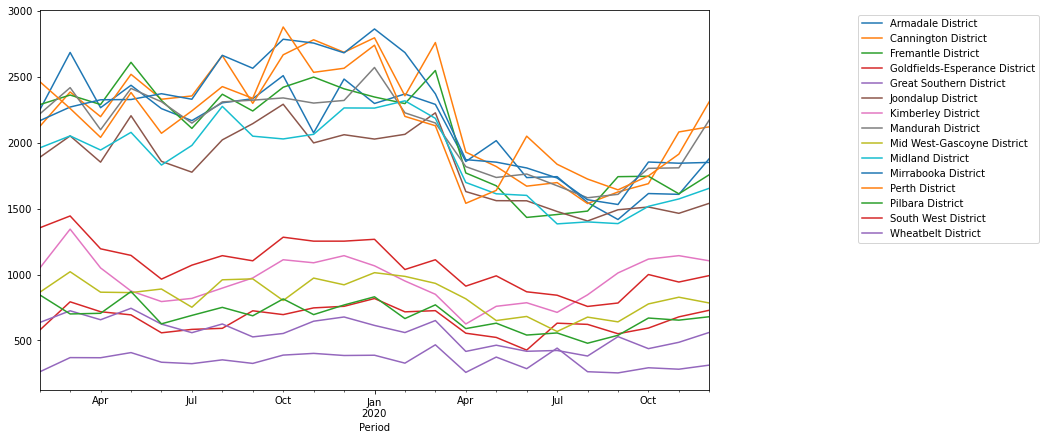

In [75]:
Total = Grouped2019.groupby(['Website Region','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
Total2=Total[(Total['Website Region']!='Metropolitan Region')&(Total['Website Region']!='Regional WA Region')&(Total['Website Region']!='Western Australia')]
Totalpivot = Total2.pivot(index='Period', columns='Website Region', values='COUNT_of_Offnc_ID')
Totalpivot.plot(figsize=(12,7))
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.show()


In [66]:
#for region in regionlist:
    print(Total[region])
    
#     x = Total[region]["Period"]
#     y = Total[region]["COUNT_of_Offnc_ID"]
#     plt.scatter(x,y, label=region)

KeyError: 'Armadale District'

In [67]:
Total

,Website Region,Period,COUNT_of_Offnc_ID
0,Armadale District,2019-02-01,2247.0
1,Armadale District,2019-03-01,2684.0
2,Armadale District,2019-04-01,2265.0
3,Armadale District,2019-05-01,2435.0
4,Armadale District,2019-06-01,2258.0
...,...,...,...
409,Wheatbelt District,2020-08-01,263.0
410,Wheatbelt District,2020-09-01,254.0
411,Wheatbelt District,2020-10-01,293.0
412,Wheatbelt District,2020-11-01,282.0


## Total WA Data

In [89]:
# population = {'Armadale District':"x", 'Cannington District':"x", 'Fremantle District':'x',
#        'Goldfields-Esperance District':54363, 'Great Southern District':60993,
#        'Joondalup District':"x", 'Kimberley District':35901, 'Mandurah District':142960,
#        'Metropolitan Region':1900000, 'Mid West-Gascoyne District':62932,
#        'Midland District':'x', 'Mirrabooka District':'x', 'Perth District':"x",
#        'Pilbara District':62093, 'Regional WA Region':'x', 'South West District':179791,
#        'Western Australia':'x', 'Wheatbelt District':73437}

population = {'Website Region' : ['Goldfields-Esperance District', 'Great Southern District',
        'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Pilbara District', 'South West District', 'Wheatbelt District'],
    'Population': [54363, 60993,35901, 142960,1900000, 62932,62093, 179791, 73437]}

In [90]:
pop_df = pd.DataFrame(population)

In [95]:
allrates = pd.merge(Total, pop_df,on='Website Region')
allrates['Rate'] = allrates['COUNT_of_Offnc_ID']/(allrates['Population'])*100000
allrates['Period'] = allrates['Period'].dt.strftime('%Y-%m')

In [107]:
timeframes = allrates[(allrates['Period']=='2020-02')|(allrates['Period']=='2020-04')|(allrates['Period']=='2020-06')]
timeframes = timeframes[["Website Region",'Period','Rate']]
timeframes.to_csv("timeframes.csv", encoding = "utf-8", index=False)

In [124]:
overallchange = timeframes.set_index(["Website Region",'Period']).pct_change().multiply(100).round(2)

In [164]:
overallchange.reset_index(inplace=True)
Regionsinto = overallchange[overallchange['Period']=='2020-04-01']
Regionsout = overallchange[overallchange['Period']=='2020-06-01']

In [163]:
overallchange

,Website Region,Period,Rate
0,Goldfields-Esperance District,2020-02-01,NaN
1,Goldfields-Esperance District,2020-04-01,-22.59
2,Goldfields-Esperance District,2020-06-01,-23.06
3,Great Southern District,2020-02-01,16.89
4,Great Southern District,2020-04-01,-25.54
5,Great Southern District,2020-06-01,0.24
6,Kimberley District,2020-02-01,286.53
7,Kimberley District,2020-04-01,-34.28
8,Kimberley District,2020-06-01,25.76
9,Mandurah District,2020-02-01,-28.88


In [126]:
Regionsinto.to_csv("Regionsinto.csv", encoding = "utf-8", index=False)
Regionsout.to_csv("Regionsout.csv", encoding = "utf-8", index=False)

In [233]:
Domesticviolence = Grouped2019.copy()
Domesticviolence['Period'] = Domesticviolence['Period'].dt.strftime('%Y-%m')
Domesticviolence = Grouped2019[((Grouped2019["Period"]=="2020-02")|(Grouped2019["Period"]=="2020-04")|(Grouped2019["Period"]=="2020-06"))&((Grouped2019["WAPOL_Hierarchy_Lvl2"]=="Assault (Family)")|(Grouped2019["WAPOL_Hierarchy_Lvl2"]=="Threatening Behaviour (Family)"))] 
Domesticviolence = Domesticviolence.replace({'Assault (Family)':'Domestic Violence','Threatening Behaviour (Family)':'Domestic Violence'})

In [234]:
Domesticviolence

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID
3141,Armadale District,2020-02-01,Domestic Violence,223.0
3158,Armadale District,2020-02-01,Domestic Violence,29.0
3181,Armadale District,2020-04-01,Domestic Violence,153.0
3198,Armadale District,2020-04-01,Domestic Violence,20.0
3221,Armadale District,2020-06-01,Domestic Violence,166.0
...,...,...,...,...
60278,Wheatbelt District,2020-02-01,Domestic Violence,6.0
60301,Wheatbelt District,2020-04-01,Domestic Violence,33.0
60318,Wheatbelt District,2020-04-01,Domestic Violence,5.0
60341,Wheatbelt District,2020-06-01,Domestic Violence,28.0


In [235]:
Domesticviolence = Domesticviolence.groupby(["Website Region",'Period','WAPOL_Hierarchy_Lvl2'])['COUNT_of_Offnc_ID'].sum().reset_index()
Domesticviolence

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID
0,Armadale District,2020-02-01,Domestic Violence,252.0
1,Armadale District,2020-04-01,Domestic Violence,173.0
2,Armadale District,2020-06-01,Domestic Violence,180.0
3,Cannington District,2020-02-01,Domestic Violence,132.0
4,Cannington District,2020-04-01,Domestic Violence,140.0
5,Cannington District,2020-06-01,Domestic Violence,130.0
6,Fremantle District,2020-02-01,Domestic Violence,156.0
7,Fremantle District,2020-04-01,Domestic Violence,162.0
8,Fremantle District,2020-06-01,Domestic Violence,118.0
9,Goldfields-Esperance District,2020-02-01,Domestic Violence,94.0


In [236]:
Domesticviolencerates = pd.merge(Domesticviolence, pop_df,on='Website Region')
Domesticviolencerates

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Population
0,Goldfields-Esperance District,2020-02-01,Domestic Violence,94.0,54363
1,Goldfields-Esperance District,2020-04-01,Domestic Violence,88.0,54363
2,Goldfields-Esperance District,2020-06-01,Domestic Violence,86.0,54363
3,Great Southern District,2020-02-01,Domestic Violence,69.0,60993
4,Great Southern District,2020-04-01,Domestic Violence,64.0,60993
5,Great Southern District,2020-06-01,Domestic Violence,78.0,60993
6,Kimberley District,2020-02-01,Domestic Violence,249.0,35901
7,Kimberley District,2020-04-01,Domestic Violence,199.0,35901
8,Kimberley District,2020-06-01,Domestic Violence,287.0,35901
9,Mandurah District,2020-02-01,Domestic Violence,210.0,142960


In [237]:
Domesticviolencerates['Rate'] = Domesticviolencerates['COUNT_of_Offnc_ID']/(Domesticviolencerates['Population'])*100000
Domesticviolencerates

,Website Region,Period,WAPOL_Hierarchy_Lvl2,COUNT_of_Offnc_ID,Population,Rate
0,Goldfields-Esperance District,2020-02-01,Domestic Violence,94.0,54363,172.911723
1,Goldfields-Esperance District,2020-04-01,Domestic Violence,88.0,54363,161.874805
2,Goldfields-Esperance District,2020-06-01,Domestic Violence,86.0,54363,158.195832
3,Great Southern District,2020-02-01,Domestic Violence,69.0,60993,113.127736
4,Great Southern District,2020-04-01,Domestic Violence,64.0,60993,104.930074
5,Great Southern District,2020-06-01,Domestic Violence,78.0,60993,127.883528
6,Kimberley District,2020-02-01,Domestic Violence,249.0,35901,693.573995
7,Kimberley District,2020-04-01,Domestic Violence,199.0,35901,554.302109
8,Kimberley District,2020-06-01,Domestic Violence,287.0,35901,799.420629
9,Mandurah District,2020-02-01,Domestic Violence,210.0,142960,146.894236


In [238]:
Domesticviolencechange = Domesticviolencerates.drop(columns="WAPOL_Hierarchy_Lvl2").set_index(["Website Region",'Period']).pct_change().multiply(100).round(2)

In [239]:
Domesticviolencechange

COUNT_of_Offnc_ID  Population  \
Website Region                Period                                      
Goldfields-Esperance District 2020-02-01                NaN         NaN   
                              2020-04-01              -6.38        0.00   
                              2020-06-01              -2.27        0.00   
Great Southern District       2020-02-01             -19.77       12.20   
                              2020-04-01              -7.25        0.00   
                              2020-06-01              21.88        0.00   
Kimberley District            2020-02-01             219.23      -41.14   
                              2020-04-01             -20.08        0.00   
                              2020-06-01              44.22        0.00   
Mandurah District             2020-02-01             -26.83      298.21   
                              2020-04-01             -15.71        0.00   
                              2020-06-01               3.95        0.00   
Metropolitan Region           2020-02-01             618.48     1229.04   
                              2020-04-01              -6.88        0.00   
                              2020-06-01              -8.94        0.00   
Mid West-Gascoyne District    2020-02-01             -88.40      -96.69   
                              2020-04-01              10.77        0.00   
                              2020-06-01             -38.89        0.00   
Pilbara District              2020-02-01              65.91       -1.33   
                              2020-04-01             -10.27        0.00   
                              2020-06-01             -14.50        0.00   
South West District           2020-02-01              -8.93      189.55   
                              2020-04-01               6.86        0.00   
                              2020-06-01              -3.67        0.00   
Wheatbelt District            2020-02-01             -60.00      -59.15   
                              2020-04-01              -9.52        0.00   
                              2020-06-01               0.00        0.00   

                                            Rate  
Website Region                Period              
Goldfields-Esperance District 2020-02-01     NaN  
                              2020-04-01   -6.38  
                              2020-06-01   -2.27  
Great Southern District       2020-02-01  -28.49  
                              2020-04-01   -7.25  
                              2020-06-01   21.87  
Kimberley District            2020-02-01  442.35  
                              2020-04-01  -20.08  
                              2020-06-01   44.22  
Mandurah District             2020-02-01  -81.62  
                              2020-04-01  -15.71  
                              2020-06-01    3.95  
Metropolitan Region           2020-02-01  -45.94  
                              2020-04-01   -6.88  
                              2020-06-01   -8.94  
Mid West-Gascoyne District    2020-02-01  250.12  
                              2020-04-01   10.77  
                              2020-06-01  -38.89  
Pilbara District              2020-02-01   68.15  
                              2020-04-01  -10.27  
                              2020-06-01  -14.50  
South West District           2020-02-01  -68.55  
                              2020-04-01    6.86  
                              2020-06-01   -3.67  
Wheatbelt District            2020-02-01   -2.07  
                              2020-04-01   -9.52  
                              2020-06-01    0.00

In [240]:
Domesticviolencechange.drop(columns=["COUNT_of_Offnc_ID","Population"], inplace=True)

In [241]:
Domesticviolencechange

Rate
Website Region                Period            
Goldfields-Esperance District 2020-02-01     NaN
                              2020-04-01   -6.38
                              2020-06-01   -2.27
Great Southern District       2020-02-01  -28.49
                              2020-04-01   -7.25
                              2020-06-01   21.87
Kimberley District            2020-02-01  442.35
                              2020-04-01  -20.08
                              2020-06-01   44.22
Mandurah District             2020-02-01  -81.62
                              2020-04-01  -15.71
                              2020-06-01    3.95
Metropolitan Region           2020-02-01  -45.94
                              2020-04-01   -6.88
                              2020-06-01   -8.94
Mid West-Gascoyne District    2020-02-01  250.12
                              2020-04-01   10.77
                              2020-06-01  -38.89
Pilbara District              2020-02-01   68.15
                              2020-04-01  -10.27
                              2020-06-01  -14.50
South West District           2020-02-01  -68.55
                              2020-04-01    6.86
                              2020-06-01   -3.67
Wheatbelt District            2020-02-01   -2.07
                              2020-04-01   -9.52
                              2020-06-01    0.00

In [242]:
Domesticviolencechange = Domesticviolencechange.reset_index()
Domesticviolencechange

,Website Region,Period,Rate
0,Goldfields-Esperance District,2020-02-01,NaN
1,Goldfields-Esperance District,2020-04-01,-6.38
2,Goldfields-Esperance District,2020-06-01,-2.27
3,Great Southern District,2020-02-01,-28.49
4,Great Southern District,2020-04-01,-7.25
5,Great Southern District,2020-06-01,21.87
6,Kimberley District,2020-02-01,442.35
7,Kimberley District,2020-04-01,-20.08
8,Kimberley District,2020-06-01,44.22
9,Mandurah District,2020-02-01,-81.62


In [243]:
Domesticviolencechange[Domesticviolencechange['Period']=='2020-04-01']

,Website Region,Period,Rate
1,Goldfields-Esperance District,2020-04-01,-6.38
4,Great Southern District,2020-04-01,-7.25
7,Kimberley District,2020-04-01,-20.08
10,Mandurah District,2020-04-01,-15.71
13,Metropolitan Region,2020-04-01,-6.88
16,Mid West-Gascoyne District,2020-04-01,10.77
19,Pilbara District,2020-04-01,-10.27
22,South West District,2020-04-01,6.86
25,Wheatbelt District,2020-04-01,-9.52


In [244]:

Regionsdvin = Domesticviolencechange[Domesticviolencechange['Period']=='2020-04']
Regionsdvout = Domesticviolencechange[Domesticviolencechange['Period']=='2020-06']
Regionsdvin


,Website Region,Period,Rate
1,Goldfields-Esperance District,2020-04-01,-6.38
4,Great Southern District,2020-04-01,-7.25
7,Kimberley District,2020-04-01,-20.08
10,Mandurah District,2020-04-01,-15.71
13,Metropolitan Region,2020-04-01,-6.88
16,Mid West-Gascoyne District,2020-04-01,10.77
19,Pilbara District,2020-04-01,-10.27
22,South West District,2020-04-01,6.86
25,Wheatbelt District,2020-04-01,-9.52


,Website Region,Period,Rate
0,Goldfields-Esperance District,2019-02-01,NaN
1,Goldfields-Esperance District,2019-03-01,11.84
2,Goldfields-Esperance District,2019-04-01,-5.88
3,Goldfields-Esperance District,2019-05-01,-23.75
4,Goldfields-Esperance District,2019-06-01,-13.11
...,...,...,...
688,Wheatbelt District,2020-08-01,-20.51
689,Wheatbelt District,2020-09-01,-6.45
690,Wheatbelt District,2020-10-01,6.90
691,Wheatbelt District,2020-11-01,25.81


In [245]:
Regionsdvin.to_csv("Regionsdvinto.csv", encoding = "utf-8", index=False)
Regionsdvout.to_csv("Regionsdvout.csv", encoding = "utf-8", index=False)

In [ ]:
sasfile = "sasexport.xlsx"
dvhomeless = pd.read_excel(sasfile,sheet_name = "Sheet1")

In [ ]:
dvhomeless